<a href="https://colab.research.google.com/github/Rizki-132/Allmateri/blob/main/predict_price_crude_oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [17]:
price_crude_oil = pd.read_csv('/content/crude-oil-price.csv')
price_crude_oil.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646,1.36
2,1983-05-02T00:00:00,30.25,-1.241,-0.38
3,1983-06-01T00:00:00,31.38,3.736,1.13
4,1983-07-01T00:00:00,32.00,1.976,0.62


### Periksa Data

In [18]:
price_crude_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           491 non-null    object 
 1   price          491 non-null    float64
 2   percentChange  490 non-null    float64
 3   change         490 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.5+ KB


In [19]:
price_crude_oil.describe()

,price,percentChange,change
count,491.000000,490.000000,490.000000
mean,45.799546,0.727065,0.088852
std,28.937852,10.532872,4.968952
min,10.420000,-54.245000,-32.830000
25%,20.415000,-5.292000,-1.715000
50%,32.700000,0.924500,0.260000
75%,68.080000,6.360750,2.332500
max,140.000000,88.376000,16.650000


In [20]:
price_crude_oil['date']

0      1983-03-30T00:00:00
1      1983-04-04T00:00:00
2      1983-05-02T00:00:00
3      1983-06-01T00:00:00
4      1983-07-01T00:00:00
              ...         
486    2023-09-01T00:00:00
487    2023-10-02T00:00:00
488    2023-11-01T00:00:00
489    2023-12-01T00:00:00
490    2024-01-02T00:00:00
Name: date, Length: 491, dtype: object

In [21]:
#untuk memisahkan tanggal
price_crude_oil['years'] = price_crude_oil['date'].apply(lambda x: x.lstrip()[:4]).astype(int)
price_crude_oil

,date,price,percentChange,change,years
0,1983-03-30T00:00:00,29.2700,NaN,NaN,1983
1,1983-04-04T00:00:00,30.6300,4.646,1.3600,1983
2,1983-05-02T00:00:00,30.2500,-1.241,-0.3800,1983
3,1983-06-01T00:00:00,31.3800,3.736,1.1300,1983
4,1983-07-01T00:00:00,32.0000,1.976,0.6200,1983
...,...,...,...,...,...
486,2023-09-01T00:00:00,88.8000,7.040,5.8400,2023
487,2023-10-02T00:00:00,80.5000,-9.347,-8.3000,2023
488,2023-11-01T00:00:00,76.0500,-5.528,-4.4500,2023
489,2023-12-01T00:00:00,71.6500,-5.786,-4.4000,2023


In [22]:
price_crude_oil['years']

0      1983
1      1983
2      1983
3      1983
4      1983
       ... 
486    2023
487    2023
488    2023
489    2023
490    2024
Name: years, Length: 491, dtype: int64

In [23]:
years = price_crude_oil['years']
data_tahun = np.array(years)
data_tahun

array([1983, 1983, 1983, 1983, 1983, 1983, 1983, 1983, 1983, 1983, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984,
       1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985,
       1985, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986,
       1986, 1986, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987,
       1987, 1987, 1987, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988,
       1988, 1988, 1988, 1988, 1989, 1989, 1989, 1989, 1989, 1989, 1989,
       1989, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1990, 1990,
       1990, 1990, 1990, 1990, 1990, 1990, 1991, 1991, 1991, 1991, 1991,
       1991, 1991, 1991, 1991, 1991, 1991, 1991, 1992, 1992, 1992, 1992,
       1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1993, 1993, 1993,
       1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1994, 1994,
       1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1995,
       1995, 1995, 1995, 1995, 1995, 1995, 1995, 19

In [24]:
price = price_crude_oil['price']
data_harga = np.array(price)
data_harga

array([ 29.27  ,  30.63  ,  30.25  ,  31.38  ,  32.    ,  31.59  ,
        30.36  ,  30.37  ,  29.23  ,  29.6   ,  29.98  ,  30.55  ,
        30.85  ,  30.26  ,  30.83  ,  29.75  ,  27.6   ,  29.23  ,
        29.66  ,  28.46  ,  27.31  ,  26.41  ,  26.41  ,  26.73  ,
        28.29  ,  27.63  ,  27.84  ,  26.87  ,  27.12  ,  28.08  ,
        29.08  ,  30.38  ,  29.75  ,  26.3   ,  18.83  ,  13.26  ,
        10.42  ,  13.34  ,  14.3   ,  12.78  ,  11.15  ,  15.9   ,
        14.77  ,  15.27  ,  15.    ,  17.94  ,  18.75  ,  16.6   ,
        18.83  ,  18.73  ,  19.38  ,  20.29  ,  21.37  ,  19.73  ,
        19.59  ,  19.96  ,  18.51  ,  16.7   ,  16.94  ,  16.01  ,
        17.08  ,  17.99  ,  17.51  ,  15.16  ,  16.31  ,  15.18  ,
        13.37  ,  13.58  ,  15.32  ,  17.24  ,  17.03  ,  18.15  ,
        20.19  ,  20.42  ,  19.9   ,  20.27  ,  18.31  ,  18.83  ,
        20.13  ,  19.94  ,  19.89  ,  21.82  ,  22.68  ,  21.54  ,
        20.28  ,  18.54  ,  17.4   ,  17.07  ,  20.69  ,  27.3

# Visulization

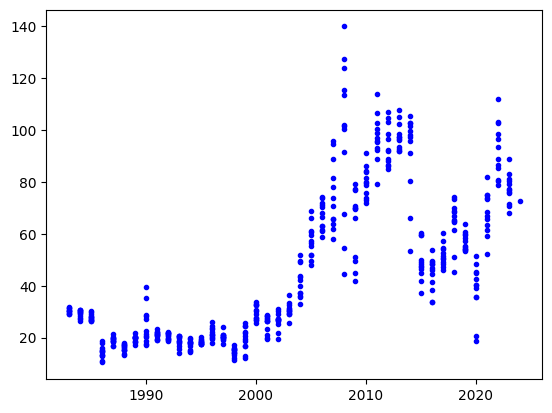

In [25]:
plt.plot(data_tahun, data_harga, 'b.')
plt.show()

In [26]:
df = pd.DataFrame()
df['Tahun'] = data_tahun
df['Harga'] = data_harga

df.head()

,Tahun,Harga
0,1983,29.27
1,1983,30.63
2,1983,30.25
3,1983,31.38
4,1983,32.00


# Split Model

In [27]:
X = df[['Tahun']]
y = df['Harga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('Original Training Data :', X.shape)
print('Original Target Value :', y.shape)

print('Training Data :', X_train.shape)
print('Training Target Value :', y_train.shape)

print('Testing Data :', X_test.shape)
print('Testing Target Value :', y_test.shape)

Original Training Data : (491,)
Original Target Value : (491,)
Training Data : (343,)
Training Target Value : (343,)
Testing Data : (148,)
Testing Target Value : (148,)


In [ ]:
X_train.head()

3      1983
341    2011
446    2020
60     1988
110    1992
Name: Tahun, dtype: int64

In [ ]:
y_train.head()

3      31.38
341    88.81
446    35.49
60     17.08
110    22.11
Name: Harga, dtype: float64

In [ ]:
X_test.head()

452    2020
84     1990
434    2019
474    2022
428    2018
Name: Tahun, dtype: int64

In [ ]:
y_test.head()

452    45.34
84     20.28
434    53.50
474    78.72
428    50.93
Name: Harga, dtype: float64

# Model

In [15]:
Model = LinearRegression()
Model.fit(X_train, y_train)

LinearRegression()

In [67]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [68]:
X_poly

array([[1.983000e+03, 3.932289e+06],
       [1.983000e+03, 3.932289e+06],
       [1.983000e+03, 3.932289e+06],
       [1.983000e+03, 3.932289e+06],
       [1.983000e+03, 3.932289e+06],
       [1.983000e+03, 3.932289e+06],
       [1.983000e+03, 3.932289e+06],
       [1.983000e+03, 3.932289e+06],
       [1.983000e+03, 3.932289e+06],
       [1.983000e+03, 3.932289e+06],
       [1.984000e+03, 3.936256e+06],
       [1.984000e+03, 3.936256e+06],
       [1.984000e+03, 3.936256e+06],
       [1.984000e+03, 3.936256e+06],
       [1.984000e+03, 3.936256e+06],
       [1.984000e+03, 3.936256e+06],
       [1.984000e+03, 3.936256e+06],
       [1.984000e+03, 3.936256e+06],
       [1.984000e+03, 3.936256e+06],
       [1.984000e+03, 3.936256e+06],
       [1.984000e+03, 3.936256e+06],
       [1.984000e+03, 3.936256e+06],
       [1.985000e+03, 3.940225e+06],
       [1.985000e+03, 3.940225e+06],
       [1.985000e+03, 3.940225e+06],
       [1.985000e+03, 3.940225e+06],
       [1.985000e+03, 3.940225e+06],
 

In [69]:
regression = LinearRegression()
regression.fit(X_poly, y)

x_line_fitted = np.linspace(X.min(), X.max(), num=100)
y_line_fitted = regression.intercept_

for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_line_fitted = y_line_fitted + regression.coef_[i] * (x_line_fitted**exponent )

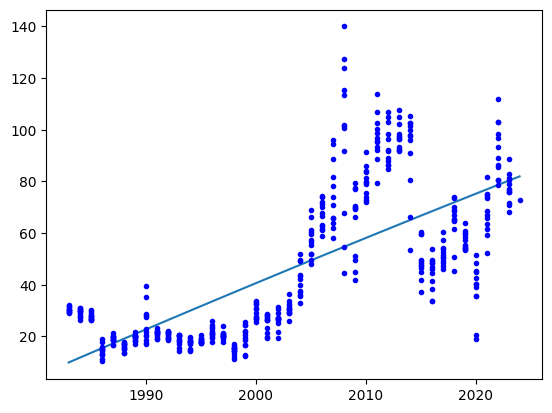

In [70]:
plt.plot(x_line_fitted, y_line_fitted)
plt.plot(X, y, 'b.')
plt.show()